#Exercise




Estimate the location from WIFI Signal Strength




The dataset has 2,000 rows and 8 columns. The data contains wifi signal strength observed from 7 wifi devices on a smartphone collected in an indoor space which could be used to estimate the location in one of the four rooms.




You can use ANN analysis for this exerise to improve the ANN performance.

In [327]:
from google.colab import drive
drive.mount('/drive')

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split


path = '/drive/MyDrive/apu-dl-datasets/wifi.csv'

df = pd.read_csv(path)

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


In [328]:
df

,Wifi 1,Wifi 2,Wifi 3,Wifi 4,Wifi 5,Wifi 6,Wifi 7,Room
0,-64,-56,-61,-66,-71,-82,-81,1
1,-68,-57,-61,-65,-71,-85,-85,1
2,-63,-60,-60,-67,-76,-85,-84,1
3,-61,-60,-68,-62,-77,-90,-80,1
4,-63,-65,-60,-63,-77,-81,-87,1
...,...,...,...,...,...,...,...,...
1995,-59,-59,-48,-66,-50,-86,-94,4
1996,-59,-56,-50,-62,-47,-87,-90,4
1997,-62,-59,-46,-65,-45,-87,-88,4
1998,-62,-58,-52,-61,-41,-90,-85,4


In [329]:
df.head().T

,0,1,2,3,4
Wifi 1,-64,-68,-63,-61,-63
Wifi 2,-56,-57,-60,-60,-65
Wifi 3,-61,-61,-60,-68,-60
Wifi 4,-66,-65,-67,-62,-63
Wifi 5,-71,-71,-76,-77,-77
Wifi 6,-82,-85,-85,-90,-81
Wifi 7,-81,-85,-84,-80,-87
Room,1,1,1,1,1


In [330]:
df.columns

Index(['Wifi 1', 'Wifi 2', 'Wifi 3', 'Wifi 4', 'Wifi 5', 'Wifi 6', 'Wifi 7',
       'Room'],
      dtype='object')

In [331]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Wifi 1  2000 non-null   int64
 1   Wifi 2  2000 non-null   int64
 2   Wifi 3  2000 non-null   int64
 3   Wifi 4  2000 non-null   int64
 4   Wifi 5  2000 non-null   int64
 5   Wifi 6  2000 non-null   int64
 6   Wifi 7  2000 non-null   int64
 7   Room    2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


In [332]:
data = df.copy()

In [333]:
data

,Wifi 1,Wifi 2,Wifi 3,Wifi 4,Wifi 5,Wifi 6,Wifi 7,Room
0,-64,-56,-61,-66,-71,-82,-81,1
1,-68,-57,-61,-65,-71,-85,-85,1
2,-63,-60,-60,-67,-76,-85,-84,1
3,-61,-60,-68,-62,-77,-90,-80,1
4,-63,-65,-60,-63,-77,-81,-87,1
...,...,...,...,...,...,...,...,...
1995,-59,-59,-48,-66,-50,-86,-94,4
1996,-59,-56,-50,-62,-47,-87,-90,4
1997,-62,-59,-46,-65,-45,-87,-88,4
1998,-62,-58,-52,-61,-41,-90,-85,4


In [334]:
data.head().T

,0,1,2,3,4
Wifi 1,-64,-68,-63,-61,-63
Wifi 2,-56,-57,-60,-60,-65
Wifi 3,-61,-61,-60,-68,-60
Wifi 4,-66,-65,-67,-62,-63
Wifi 5,-71,-71,-76,-77,-77
Wifi 6,-82,-85,-85,-90,-81
Wifi 7,-81,-85,-84,-80,-87
Room,1,1,1,1,1


In [335]:
# One Hot Encoding

marital_dummies = pd.get_dummies(data['Room'])

Y = pd.concat([data['Room'], marital_dummies], axis = 1)

Y = Y.drop('Room', axis =1)

In [336]:
X = data.drop('Room', axis = 1)

In [337]:
X

,Wifi 1,Wifi 2,Wifi 3,Wifi 4,Wifi 5,Wifi 6,Wifi 7
0,-64,-56,-61,-66,-71,-82,-81
1,-68,-57,-61,-65,-71,-85,-85
2,-63,-60,-60,-67,-76,-85,-84
3,-61,-60,-68,-62,-77,-90,-80
4,-63,-65,-60,-63,-77,-81,-87
...,...,...,...,...,...,...,...
1995,-59,-59,-48,-66,-50,-86,-94
1996,-59,-56,-50,-62,-47,-87,-90
1997,-62,-59,-46,-65,-45,-87,-88
1998,-62,-58,-52,-61,-41,-90,-85


In [338]:
Y

,1,2,3,4
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
1995,0,0,0,1
1996,0,0,0,1
1997,0,0,0,1
1998,0,0,0,1


In [339]:
# Make training and testing datasets for X and Y.

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0)

print("X_train shape", X_train.shape)

print("X_test shape", X_test.shape)

print("Y_train shape", Y_train.shape)

print("Y_test shape", Y_test.shape)

X_train shape (1600, 7)
X_test shape (400, 7)
Y_train shape (1600, 4)
Y_test shape (400, 4)


In [340]:
# Import keras initializers and regularizers

from keras import initializers
from keras import regularizers

# Import the Sequential

from keras.models import Sequential
from keras.layers import Dense

In [341]:
# Number of neurals
L1 = 100 # First hidden layer neurons
L2 = 100 # Second hidden layer neurons

# This means parameters in input model. In X_train, there are only 7 Wifi columns.
input = 7

# Activation functions
activation_function = 'relu'
activation_function2 = 'relu'
output_activation_function = 'softmax'

# Kernel initializers
kernel_initializer1 = 'he_normal'

# Number of outputs
# You need to know your columns, for example, you only made a column "Target", so here only one value.
no_of_output = 4

# Initialize object
model = Sequential()

# First hidden layer
model.add(Dense(L1, input_dim=input, activation=activation_function, kernel_initializer=kernel_initializer1, kernel_regularizer = regularizers.l2(0.01)))

# Second hidden layer
model.add(Dense(L2, activation=activation_function2))

# Output layer
model.add(Dense(no_of_output, activation=output_activation_function))


In [342]:
model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer = 'adam')

In [343]:
history = model.fit(X_train, Y_train, epochs = 10, batch_size = 100, validation_data = (X_test, Y_test))

Epoch 1/10
16/16 [==============================] - 1s 17ms/step - loss: 20.9625 - accuracy: 0.4863 - val_loss: 9.0550 - val_accuracy: 0.5000
Epoch 2/10
16/16 [==============================] - 0s 6ms/step - loss: 4.2409 - accuracy: 0.6438 - val_loss: 2.6289 - val_accuracy: 0.8475
Epoch 3/10
16/16 [==============================] - 0s 5ms/step - loss: 2.3755 - accuracy: 0.8881 - val_loss: 2.1521 - val_accuracy: 0.9300
Epoch 4/10
16/16 [==============================] - 0s 4ms/step - loss: 2.1221 - accuracy: 0.9444 - val_loss: 2.1427 - val_accuracy: 0.9250
Epoch 5/10
16/16 [==============================] - 0s 6ms/step - loss: 2.0284 - accuracy: 0.9581 - val_loss: 2.0273 - val_accuracy: 0.9450
Epoch 6/10
16/16 [==============================] - 0s 5ms/step - loss: 2.0026 - accuracy: 0.9600 - val_loss: 2.0005 - val_accuracy: 0.9500
Epoch 7/10
16/16 [==============================] - 0s 5ms/step - loss: 1.9570 - accuracy: 0.9638 - val_loss: 2.0157 - val_accuracy: 0.9350
Epoch 8/10
16/16 [

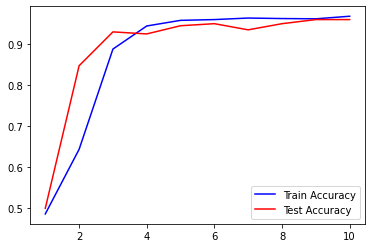

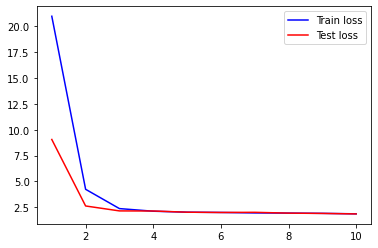

In [344]:
# Bring back the previous code and run. No changes in this part.
# Visualisations

import matplotlib.pyplot as plt

acc2 = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss2 = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc2)+1)

# 'b' and 'r' are blue and red color

plt.plot(epochs, acc2, 'b', label='Train Accuracy')
plt.plot(epochs, val_acc, 'r', label='Test Accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss2, 'b', label = 'Train loss')
plt.plot(epochs, val_loss, 'r', label = 'Test loss')
plt.legend()
plt.show()